## Basic SIR Model

This is a basic SIR model which assumes that when someone recovers. they gain immunity forever.

By changing the beta values, this could represent lockdowns / face masks.

A reduction in beta reduces transmission. Beta is a value that represents a (contact rate) and p (probability of transmission) and therefore reducing beta would reduce the amount of people getting infected

R0 is commonly referred to in the literature. This is basically the beta / gamma and refers to the amount of people one person would infect. So as beta decreases, the R0 would decrease. 

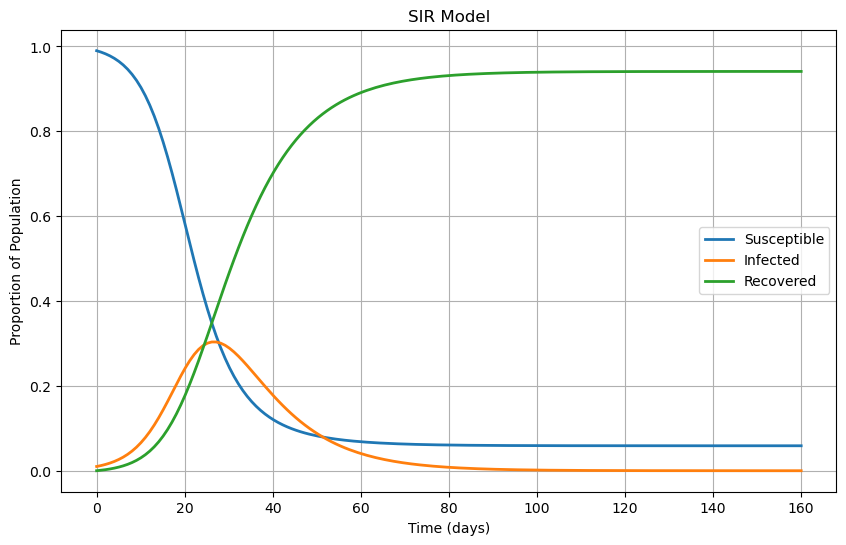

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
beta = 0.3  # Infection rate
gamma = 0.1  # Recovery rate

# Initial conditions
S0 = 0.99  # Initial fraction of the population that is susceptible
I0 = 0.01  # Initial fraction of the population that is infected
R0 = 0.0   # Initial fraction of the population that is recovered
initial_conditions = [S0, I0, R0]

# Time points (days)
t = np.linspace(0, 160, 160)

# SIR model differential equations
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# Solve the differential equations
solution = odeint(sir_model, initial_conditions, t, args=(beta, gamma))
S, I, R = solution.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', linewidth=2)
plt.plot(t, I, label='Infected', linewidth=2)
plt.plot(t, R, label='Recovered', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('SIR Model')
plt.legend()
plt.grid(True)
plt.show()


## SIRS Model

In this model, some of the recovered population do not gain immunity. 

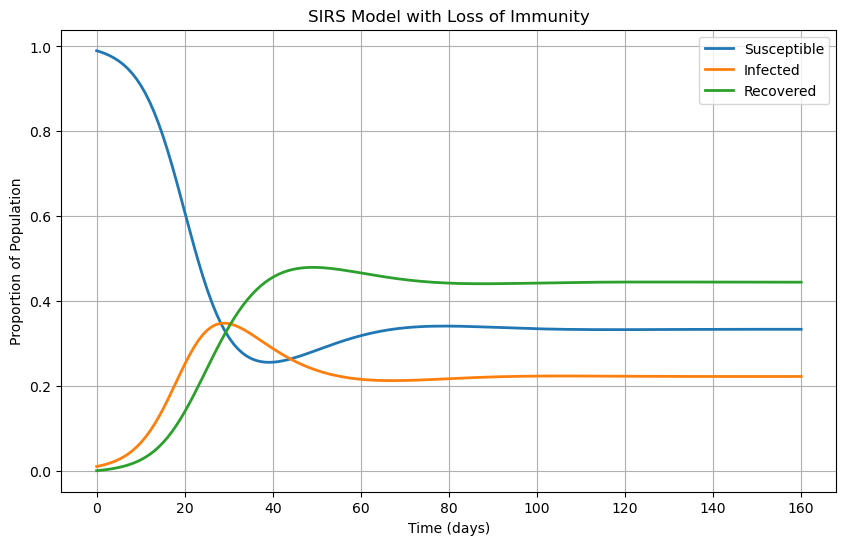

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
beta = 0.3    # Infection rate
gamma = 0.1   # Recovery rate
delta = 0.05  # Rate of loss of immunity

# Initial conditions
S0 = 0.99     # Initial fraction of susceptible population
I0 = 0.01     # Initial fraction of infected population
R0 = 0.0      # Initial fraction of recovered population
initial_conditions = [S0, I0, R0]

# Time points (days)
t = np.linspace(0, 160, 160)

# SIRS model differential equations
def sirs_model(y, t, beta, gamma, delta):
    S, I, R = y
    dS_dt = -beta * S * I + delta * R  # Susceptibles increase as immunity wanes
    dI_dt = beta * S * I - gamma * I   # Infected individuals
    dR_dt = gamma * I - delta * R      # Recovered individuals lose immunity over time
    return [dS_dt, dI_dt, dR_dt]

# Solve the differential equations
solution = odeint(sirs_model, initial_conditions, t, args=(beta, gamma, delta))
S, I, R = solution.T

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', linewidth=2)
plt.plot(t, I, label='Infected', linewidth=2)
plt.plot(t, R, label='Recovered', linewidth=2)
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('SIRS Model with Loss of Immunity')
plt.legend()
plt.grid(True)
plt.show()


**Current ideas:**

- Find values to change beta values (maybe proportionally or using values from research) to mimic lockdowns / face mask wearing
- Read the two papers on GitHub
- Do the trends change when the population is taken into account?